# Road Lane Detection  - MSc Research Project


***
* Name       :- `Pranav Madathil Sasi`
***
* Student Id :- `202117885`
***
* Module     :- `MSc Research Project (771764_A21_T3A)`
***
* Supervisor :- `Oseikhuemen Davis O Ojie`
***
* Course     :- `Msc Artificial Intelligence & Data Science`
***

**Import Neccessary libraries**

In [30]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split             # To split the dataset into test ans train

# Import necessary items from Keras
from keras.models import Sequential                              # To Arrange model layers in sequantial order
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator         # To image processing
from keras import regularizers

import matplotlib.pyplot as plt
import random

import visualkeras      # To help visualize Keras neural network architectures.                           



# Model Creation

In [2]:
""" 
@desc     Funtion to Creates a model
@param    input_shape :The shape of X)train -> X_train.shape[1:] eg:-(11487, 80, 160, 3) 
          pool_size   :Desired pooling size value to create the model
@returns  The model with a total of 30 layers that includes 7 convolutional layers, 
          7 transpose convolutional layers, 3 max pooling layers, 3 2D up sampling layers and 
          10 dropout layers 
"""

def create_lane_detection_model(input_shape, pool_size):
    # Here we start build the CNN in sequantial order for better 
    # memmory management
    model = Sequential()
    # Normalizes incoming inputs. 
    model.add(BatchNormalization(input_shape=input_shape))
    
    # Convolutional layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-1'))
    
    # Convolutional layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-2'))
    
    # Pooling layer
    model.add(MaxPooling2D(pool_size=pool_size))

    # Convolutional layer 3 with droput of 20%
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-3'))
    model.add(Dropout(0.2))

    # Convolutional layer 4 with drop of 20%
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-4'))
    model.add(Dropout(0.2))
    
    # Convolutional layer 5 with drop of 20%
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-5'))
    model.add(Dropout(0.2))
    
    # Pooling layer
    model.add(MaxPooling2D(pool_size=pool_size))
    
    # Convolutional layer 6 with drop of 20%
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-6'))
    model.add(Dropout(0.2))

    # Convolutional layer 7 with drop of 20%
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2D-7'))
    model.add(Dropout(0.2))

    # Pooling layer
    model.add(MaxPooling2D(pool_size=pool_size))
    
    # Reverse order starts from here.
    # Pooling layer Up sampling layer
    model.add(UpSampling2D(size=pool_size))

    # DeConvolutional layer 1 with drop of 20%
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-1'))
    model.add(Dropout(0.2))

    # DeConvolutional layer 2 with drop of 20%
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-2'))
    model.add(Dropout(0.2))

    # Pooling layer
    model.add(UpSampling2D(size=pool_size))

    # DeConvolutional layer 3 with drop of 20%
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-3'))
    model.add(Dropout(0.2))

    # DeConvolutional layer 4 with drop of 20%
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-4'))
    model.add(Dropout(0.2))

    # DeConvolutional layer 5 with drop of 20%
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-5'))
    model.add(Dropout(0.2))

    #pooling layer
    model.add(UpSampling2D(size=pool_size))

    # DeConvolutional layer 6 with drop of 20%
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2DTranspose-6'))

    # DeConvolutional layer 7
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))
    
    # Returning created model 
    return model


In [4]:
# Load training images by using pickling
train_images = pickle.load(open("full_CNN_train.p", "rb" ))


In [5]:
# Load image labels by using pickling
labels = pickle.load(open("full_CNN_labels.p", "rb" ))

In [6]:
# Creating train image arrays as numpy array
train_images = np.array(train_images)

# Creating label arrays as numpy array
labels = np.array(labels)

# Normalize labels
labels = labels / 255

In [7]:
# Creating train images by suffling images and labels from train image and label array
train_images, labels = shuffle(train_images, labels)

#Spliting 10% of the train images and its label into X_train, X_validation, y_train, y_validation
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

In [37]:
print(X_train.shape , X_val.shape , y_train.shape , y_val.shape)

(11487, 80, 160, 3) (1277, 80, 160, 3) (11487, 80, 160, 1) (1277, 80, 160, 1)


In [8]:
# Creating necessary variable to model tuning and assigning 
batch_size = 128
epochs = 10
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [35]:
print(input_shape)

(80, 160, 3)


In [15]:
classes_count = np.unique(y_train).shape[0]
print("Number of training examples =", X_train.shape[0])
print("Number of testing examples =", X_val.shape[0])
print("Image data shape =", X_train.shape[1:])
print("Number of classes =", classes_count)  

Number of training examples = 11487
Number of testing examples = 1277
Image data shape = (80, 160, 3)
Number of classes = 256


In [9]:
# Calling model creation function.
model = create_lane_detection_model(input_shape, pool_size)

In [10]:
# Using generator processing channel shifts of train images
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

/var/folders/2b/vdq78rn50hg7n66zwwt7lmsc0000gn/T/ipykernel_3253/2101973505.py:6: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


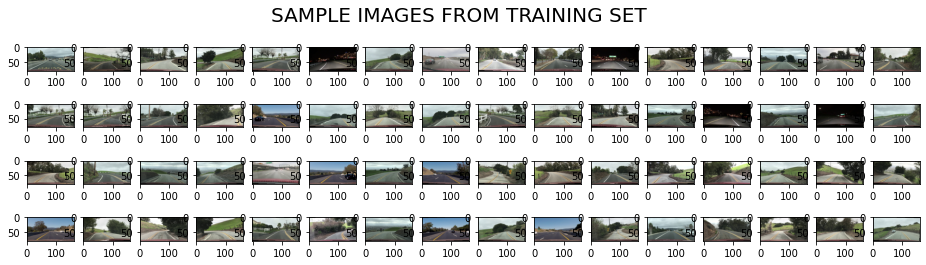

In [23]:

# To visualize the images from training set
get_ipython().magic('matplotlib inline')

""" 
@desc     Funtion to show images from training data set
@param    image_array : input image array to be visualize
          grid_x      : number of images required on x axis
          grid_y      : number of images required on y axis
          title       : Title for the visualization
"""
def draw_images_examples(image_array, grid_x, grid_y, title):
    fig = plt.figure(figsize=(grid_x,grid_y))
    fig.suptitle(title, fontsize=20)

    for i in range(1,grid_y*grid_x+1):
        index = random.randint(0, len(image_array))
        image = image_array[index].squeeze()
       
        plt.subplot(grid_y,grid_x,i)
        plt.imshow(image)
        
# Showing images in a grid 
draw_images_examples(X_train, 16, 4, 'SAMPLE IMAGES FROM TRAINING SET')

# Model training and validating  

In [11]:
# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])
history=model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
89/89 [==============================] - 740s 8s/step - loss: 0.0547 - accuracy: 0.9061 - val_loss: 0.0265 - val_accuracy: 0.9484
Epoch 2/10
89/89 [==============================] - 671s 7s/step - loss: 0.0167 - accuracy: 0.9519 - val_loss: 0.0155 - val_accuracy: 0.9536
Epoch 3/10
89/89 [==============================] - 856s 10s/step - loss: 0.0127 - accuracy: 0.9545 - val_loss: 0.0107 - val_accuracy: 0.9558
Epoch 4/10
89/89 [==============================] - 734s 8s/step - loss: 0.0106 - accuracy: 0.9559 - val_loss: 0.0093 - val_accuracy: 0.9568
Epoch 5/10
89/89 [==============================] - 724s 8s/step - loss: 0.0094 - accuracy: 0.9568 - val_loss: 0.0090 - val_accuracy: 0.9572
Epoch 6/10
89/89 [==============================] - 705s 8s/step - loss: 0.0087 - accuracy: 0.9572 - val_loss: 0.0085 - val_accuracy: 0.9576
Epoch 7/10
89/89 [==============================] - 710s 8s/step - loss: 0.0083 - accuracy: 0.9575 - val_loss: 0.0078 - val_accuracy: 0.9579
Epoch 8/10
8

In [13]:
# Freeze model layers after training is finished
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

In [31]:
# Save model architecture and its weights
 model.save('Lane_Detection_CNN_model.h5')

In [14]:
# Show summary of model
model.summary()

# Test loss and accuracy displaying
score = model.evaluate(X_val, y_val, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv2D-1 (Conv2D)           (None, 78, 158, 8)        224       
                                                                 
 Conv2D-2 (Conv2D)           (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv2D-3 (Conv2D)           (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

# Accuracy & loss visualisation

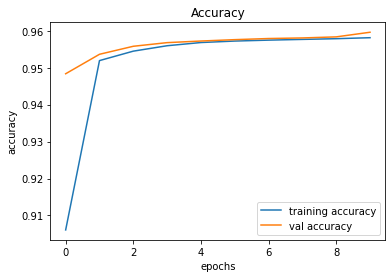

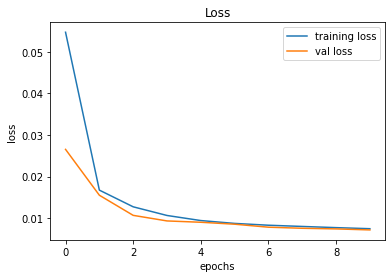

In [29]:
# ploting the graph 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

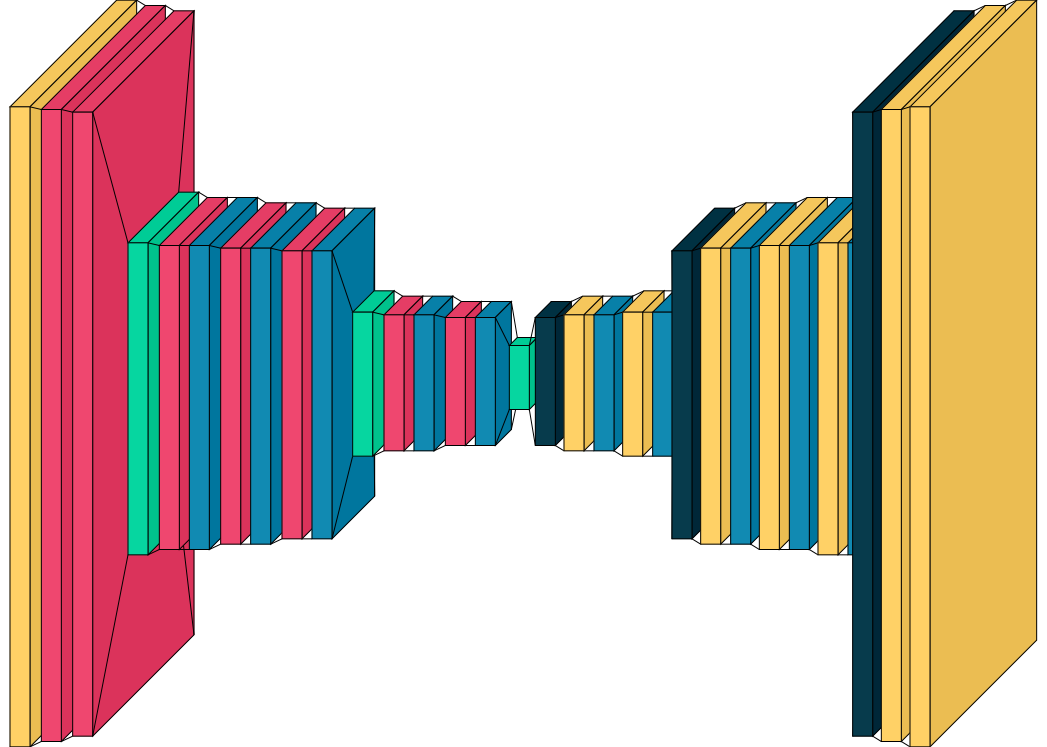

In [34]:
#Visualizing Model architeture layers
visualkeras.layered_view(model).show()
visualkeras.layered_view(model)